# MODS207
# Credit Card Fraud Detection

# project 

**By Hamza El Arji & Elie Bosle**

## 1/ Context

It is essential for credit card companies to detect fraudulent transactions to protect customers from being charged for unauthorized purchases. This not only safeguards the financial interests of the customers but also helps maintain the trust and reliability of the credit card services. Implementing robust fraud detection systems can prevent significant financial losses and enhance the overall security of the payment ecosystem. By continuously monitoring and analyzing transaction patterns, credit card companies can quickly identify and address any suspicious activity, ensuring a safer and more trustworthy environment for all users.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have **492 frauds** out of **284,807 transactions**. The dataset is highly unbalanced, the positive class (frauds) account for **0.172%** of all transactions.

The different variables that we hypothetically have are:
- TransactionID
- CustomerID
- TransactionAmount
- TransactionTime
- TransactionDate
- MerchantID
- MerchantCategory
- MerchantLocation
- CardType
- CardIssuer
- CardExpirationDate
- CustomerAge
- CustomerGender
- CustomerLocation
- CustomerAccountBalance
- CustomerTransactionHistory (e.g., number of transactions in the past month)
- CustomerAverageTransactionAmount
- CustomerLastTransactionAmount
- CustomerLastTransactionTime
- CustomerPurchaseFrequency
- CustomerCreditScore
- DeviceID
- DeviceType (e.g., mobile, desktop)
- IP Address
- GeoLocation (latitude and longitude)
- BrowserType
- TransactionChannel (e.g., online, in-store)
- PaymentMethod (e.g., credit, debit, PayPal)


## 2/ Preprocessing

## Imports

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score







In [10]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**PCA (Principal Component Analysis)** is used to convert the original variables into a new set of variables (the principal components) while preserving as much of the original information as possible. The principal components are linear combinations of the original variables, and they are ordered such that the first principal component captures the most variance in the data, the second principal component captures the most remaining variance, and so on.

**Reasons for Anonymization :**

- Confidentiality: To protect sensitive information and the privacy of users.
- Security: To prevent any possibility of reverse engineering to identify users or merchants.
- Focus on Analysis: To allow data scientists to concentrate on fraud detection techniques without being influenced by potential biases introduced by specific information.

In [11]:
# Describe Data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## a) Nan gestion

In [12]:
#Null Value Check
df.isnull().values.any()

False

There is no nan or missing value.

## b) Unbalanced classes

In [13]:
#Data Class Balance Check
print('Fraud Percentage: {}'.format(round((df['Class'].value_counts()[1]/len(df))*100,2)))
print('Non Fraud Percentage: {}'.format(round((df['Class'].value_counts()[0]/len(df))*100,2)))

Fraud Percentage: 0.17
Non Fraud Percentage: 99.83


Issue of unbalanced classes

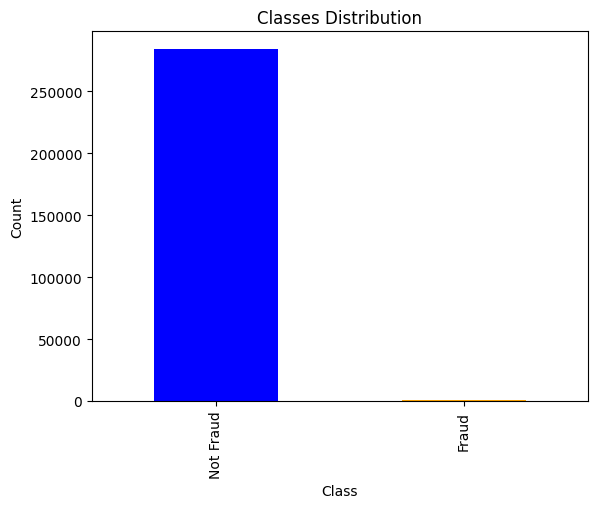

In [14]:
count = df['Class'].value_counts()
count.plot(kind='bar', color=['blue', 'orange'])
plt.xticks(range(2), ['Not Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Classes Distribution')
plt.show()

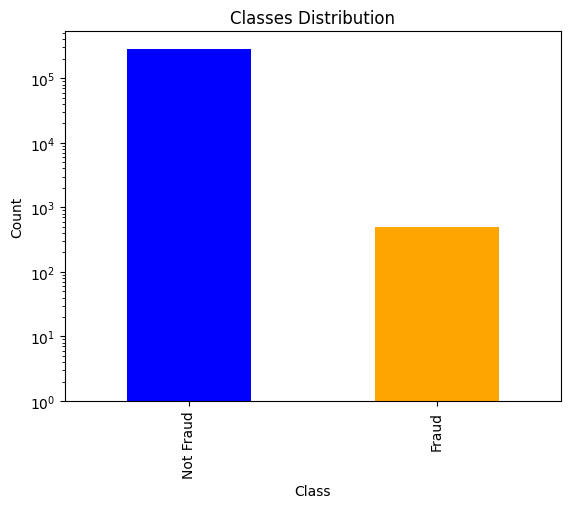

In [15]:
count = df['Class'].value_counts()
count.plot(kind='bar', color=['blue', 'orange'], log=True)
plt.xticks(range(2), ['Not Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Classes Distribution')
plt.show()

The dataset is highly imbalanced, with the majority of transactions being non-fraudulent. Using this dataset as the foundation for our predictive models and analyses could lead to significant errors and overfitting, as the algorithms may 'assume' that most transactions are not fraudulent. However, our goal is not for the model to make assumptions, but rather to identify patterns indicative of fraudulent activity.

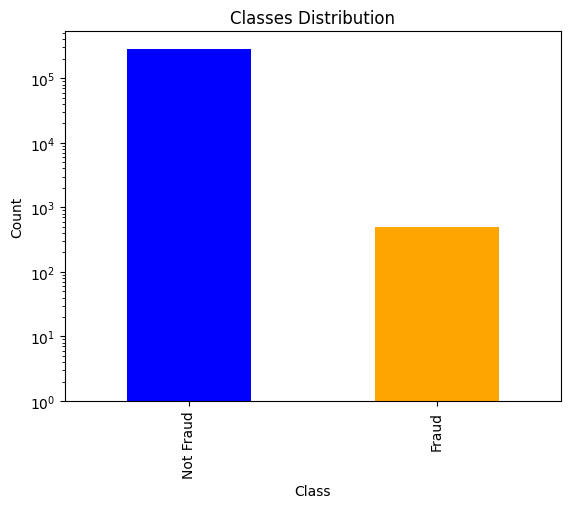

In [16]:
count = df['Class'].value_counts()
count.plot(kind='bar', color=['blue', 'orange'], log=True)
plt.xticks(range(2), ['Not Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Classes Distribution')
plt.show()

## c) Analyzing distributions

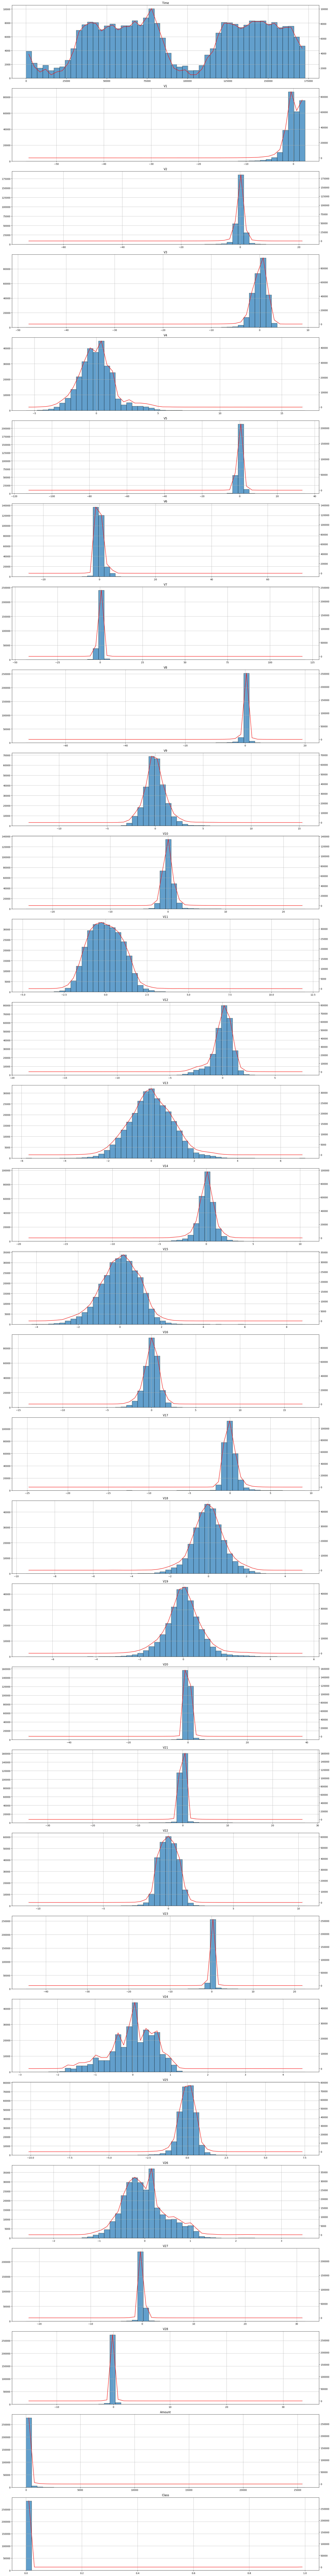

In [17]:
#distribution of each feature
def plot_hist_with_line(df):
    fig, axes = plt.subplots(len(df.columns), 1, figsize=(20, len(df.columns) * 5))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        ax = axes[i]
        df[col].hist(ax=ax, bins=50, alpha=0.7, edgecolor='black')
        
        # Plot a line on the histogram
        ax2 = ax.twinx()
        density, bins, _ = ax.hist(df[col], bins=50, alpha=0)
        bin_centers = 0.5 * (bins[1:] + bins[:-1])
        ax2.plot(bin_centers, density, '-', color='red')
        
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

# plot
plot_hist_with_line(df)

By distribution we can see transaction amounts are very small, where as time is distributed.



There is a necessity to scale the data



<Axes: >

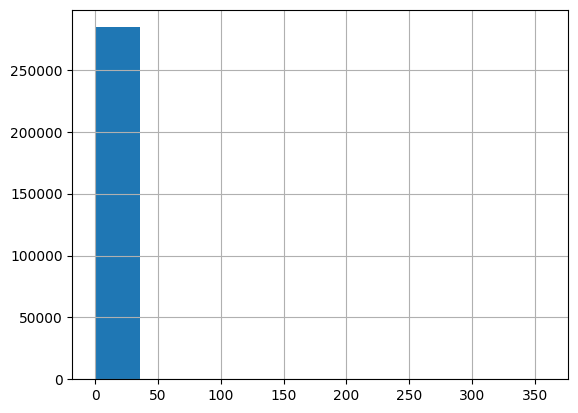

In [18]:
#we have nearly all the features are scaled, but not the amout.
#let's scale the amount
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
new_df['Amount'].hist()

How does it work robust scaler ?


Here’s the mathematical transformation applied by RobustScaler:

 X_scaled = (X - median(X)) / IQR(X)

 Where:
 - X is the original data.
 - median(X) is the median of the data.
 - IQR(X) is the interquartile range, which is Q3 - Q1 (the difference between the 75th and 25th percentiles).


<Axes: >

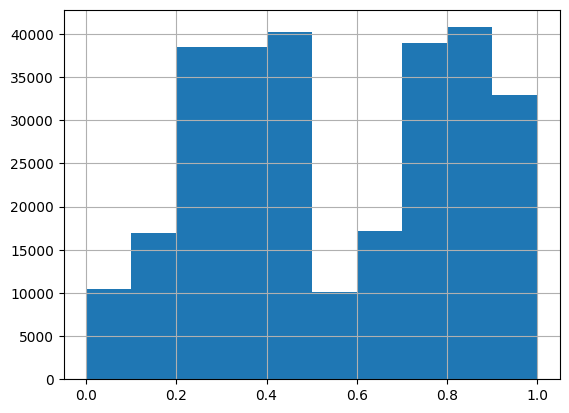

In [19]:
time = new_df['Time']
new_df['Time'] = MinMaxScaler().fit_transform(new_df['Time'].to_numpy().reshape(-1, 1))
new_df['Time'].hist()

How does it work MinMax scaler ?


Here’s the mathematical transformation applied by MinMaxScaler:

 X_scaled = (X - X.min()) / (X.max() -X.min())

 Where:
 - X is the original data
 - X.min() minimum of X
 - X.max() maximum of X


<Axes: >

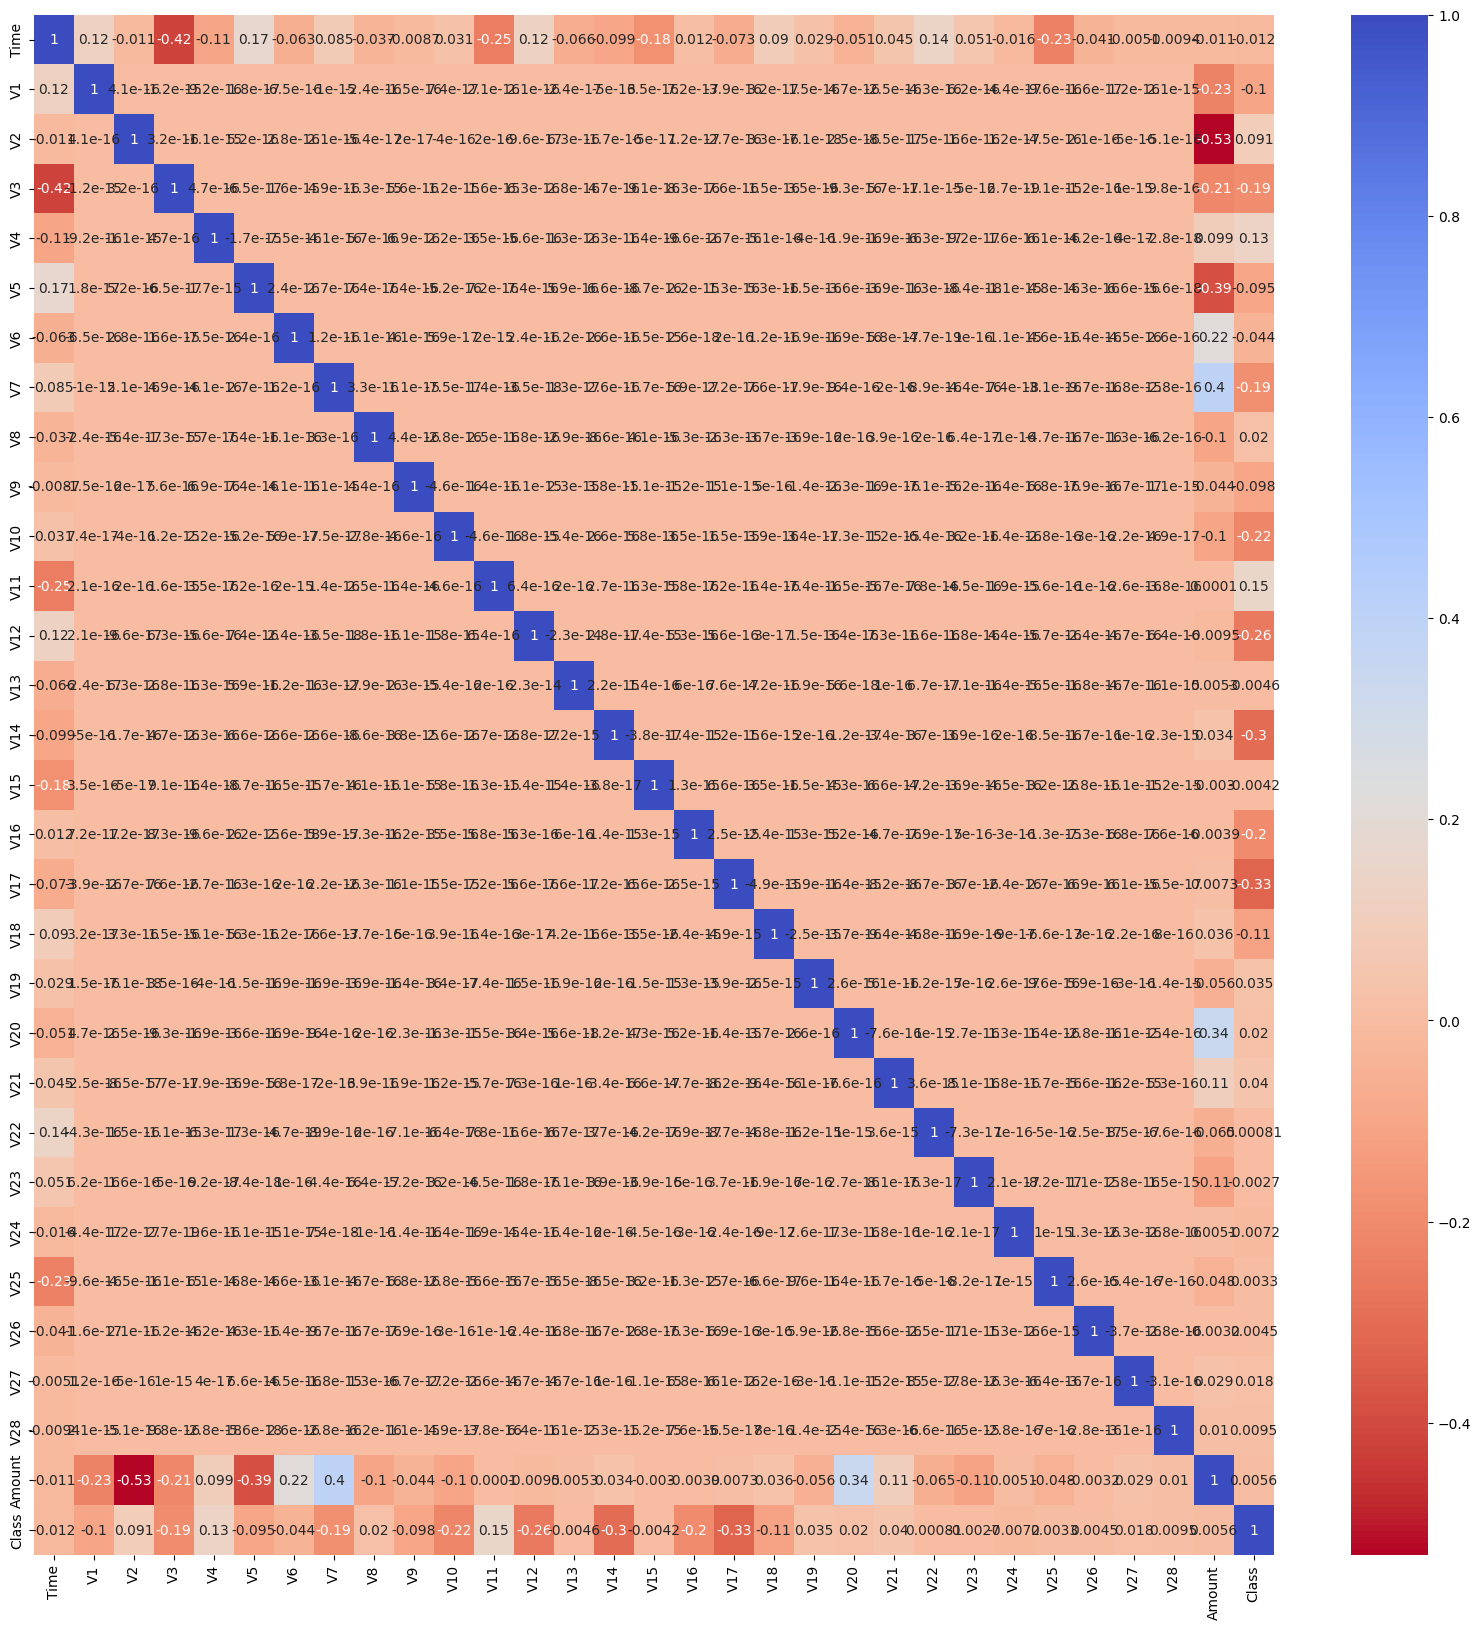

In [20]:
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),annot=True,cmap='coolwarm_r')

## d) Split and oversample

Before proceeding with the Random OverSampling  technique, we need to separate the original DataFrame. 

Why? For testing purposes. Although we are splitting the data when applying this technique, we want to test our models on the original testing set, not on the set created. The main goal is to fit the model using the oversampled data (to help our models detect patterns) and then test it on the original testing set.

In [21]:
#Split Data
x_original = new_df.drop('Class', axis=1)
y_original = new_df['Class']

x_train_original, x_test_original, y_train_original, y_test_original = train_test_split(x_original, y_original, test_size=0.2, random_state=42)
print('X train Shape: {}'.format(x_train_original.shape))
print('X test Shape: {}'.format(x_test_original.shape))
print('Y train Shape: {}'.format(y_train_original.shape))
print('Y test Shape: {}'.format(y_test_original.shape))

X train Shape: (227845, 30)
X test Shape: (56962, 30)
Y train Shape: (227845,)
Y test Shape: (56962,)


In [22]:
#Random Over Sampling
ros = RandomOverSampler(sampling_strategy=1, random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train_original, y_train_original)


In [23]:
#before and after sampling
print('Original Count: {}'.format(Counter(y_train_original)))
print('Sampled Count: {}'.format(Counter(y_train_resampled)))

Original Count: Counter({0: 227451, 1: 394})
Sampled Count: Counter({0: 227451, 1: 227451})


In [24]:
new_df_resampled = pd.concat([pd.DataFrame(x_train_resampled, columns=x_train_original.columns), pd.DataFrame(y_train_resampled, columns=['Class'])], axis=1)

In [25]:
print(new_df_resampled.head())


       Time        V1        V2        V3        V4        V5        V6  \
0  0.829622  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197   
1  0.678116 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310   
2  0.865578  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429   
3  0.542097 -0.535045  1.014587  1.750679  2.769390  0.500089  1.002270   
4  0.478350 -4.026938  1.897371 -0.429786 -0.029571 -0.855751 -0.480406   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -0.627978  0.035994  1.054560  ...  0.238197  0.968305  0.053208 -0.278602   
1  0.017959 -0.401619  0.040378  ... -0.153485  0.421703  0.113442 -1.004095   
2  0.787858  0.117276 -0.131275  ... -0.314638 -0.872959  0.083391  0.148178   
3  0.847902 -0.081323  0.371579  ...  0.063525  0.443431 -0.072754  0.448192   
4 -0.435632  1.313760  0.536044  ... -0.480691 -0.230369  0.250717  0.066399   

        V25       V26       V27       V28    Amount  Class  
0 -0.04

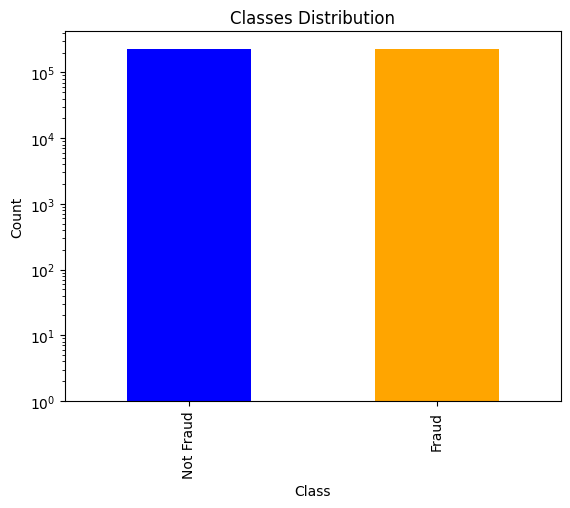

In [26]:
count = new_df_resampled['Class'].value_counts()
count.plot(kind='bar', color=['blue', 'orange'], log=True)
plt.xticks(range(2), ['Not Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Classes Distribution')
plt.show()

<Axes: >

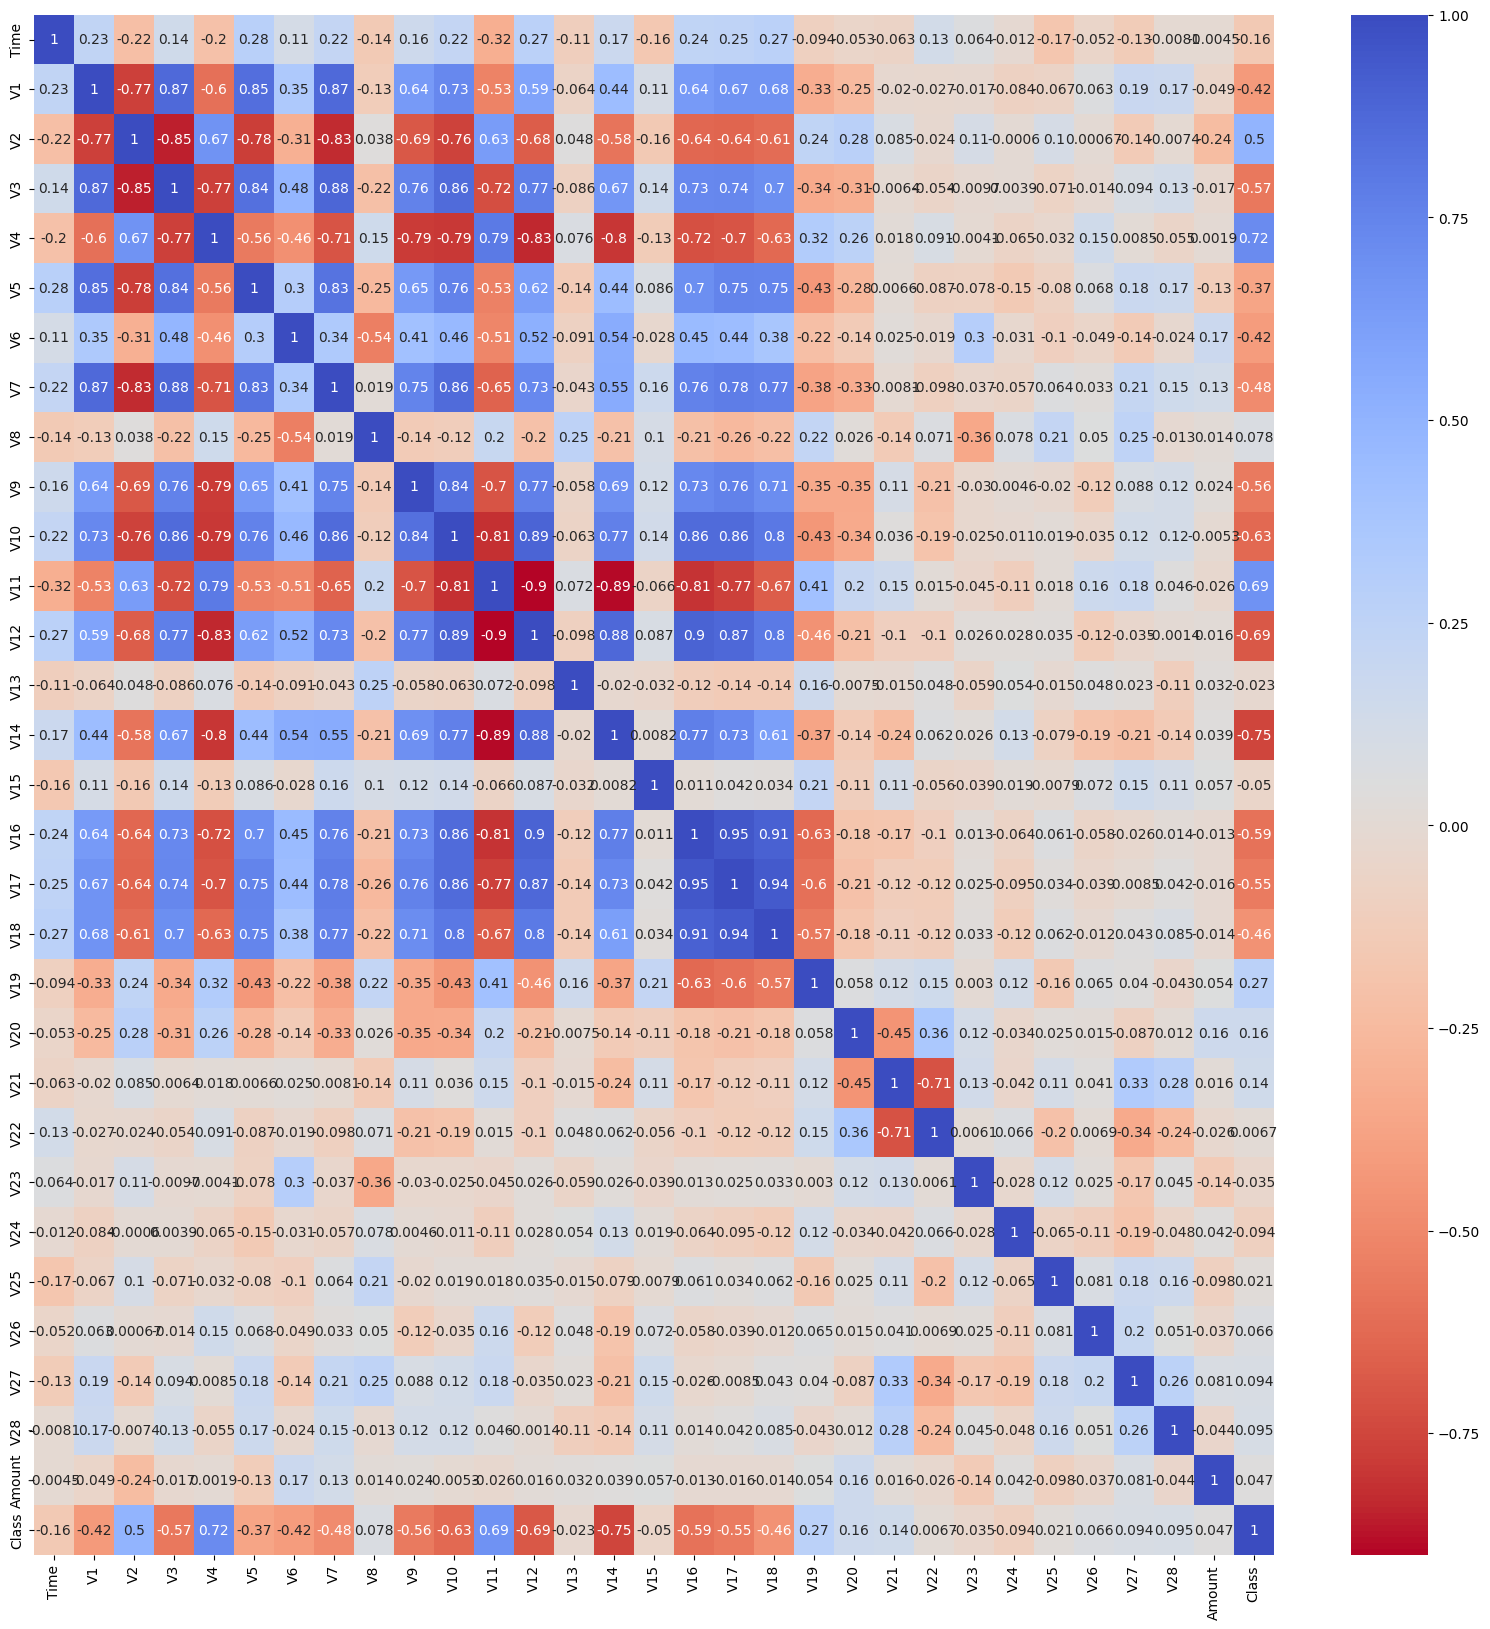

In [19]:
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(new_df_resampled.corr(),annot=True,cmap='coolwarm_r')

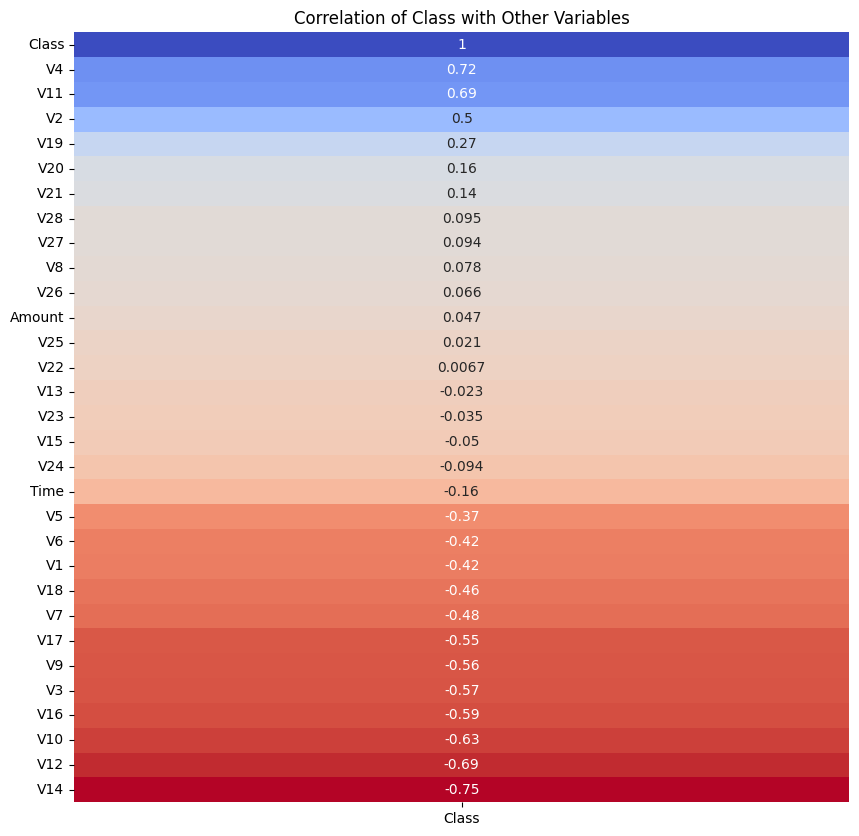

In [20]:
#better visualization
corr_matrix = new_df_resampled.corr()
class_corr = corr_matrix[['Class']].sort_values(by='Class', ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(class_corr, annot=True, cmap='coolwarm_r', cbar=False)
#plot
plt.title('Correlation of Class with Other Variables')
plt.show()

- Negative Correlations : V14, V12, V10, V16, V3, V9 and V17 ae negatively correlated to the target. The lower this values are, the more likely the end result will be a fraud.
- Positive Correlations : V4, V11, V2 and V19 ae positively correlated to the target. The higher this values are, the more likely the end result will be a fraud.

## e) Correlations

**negative Correlations**

c:\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper 

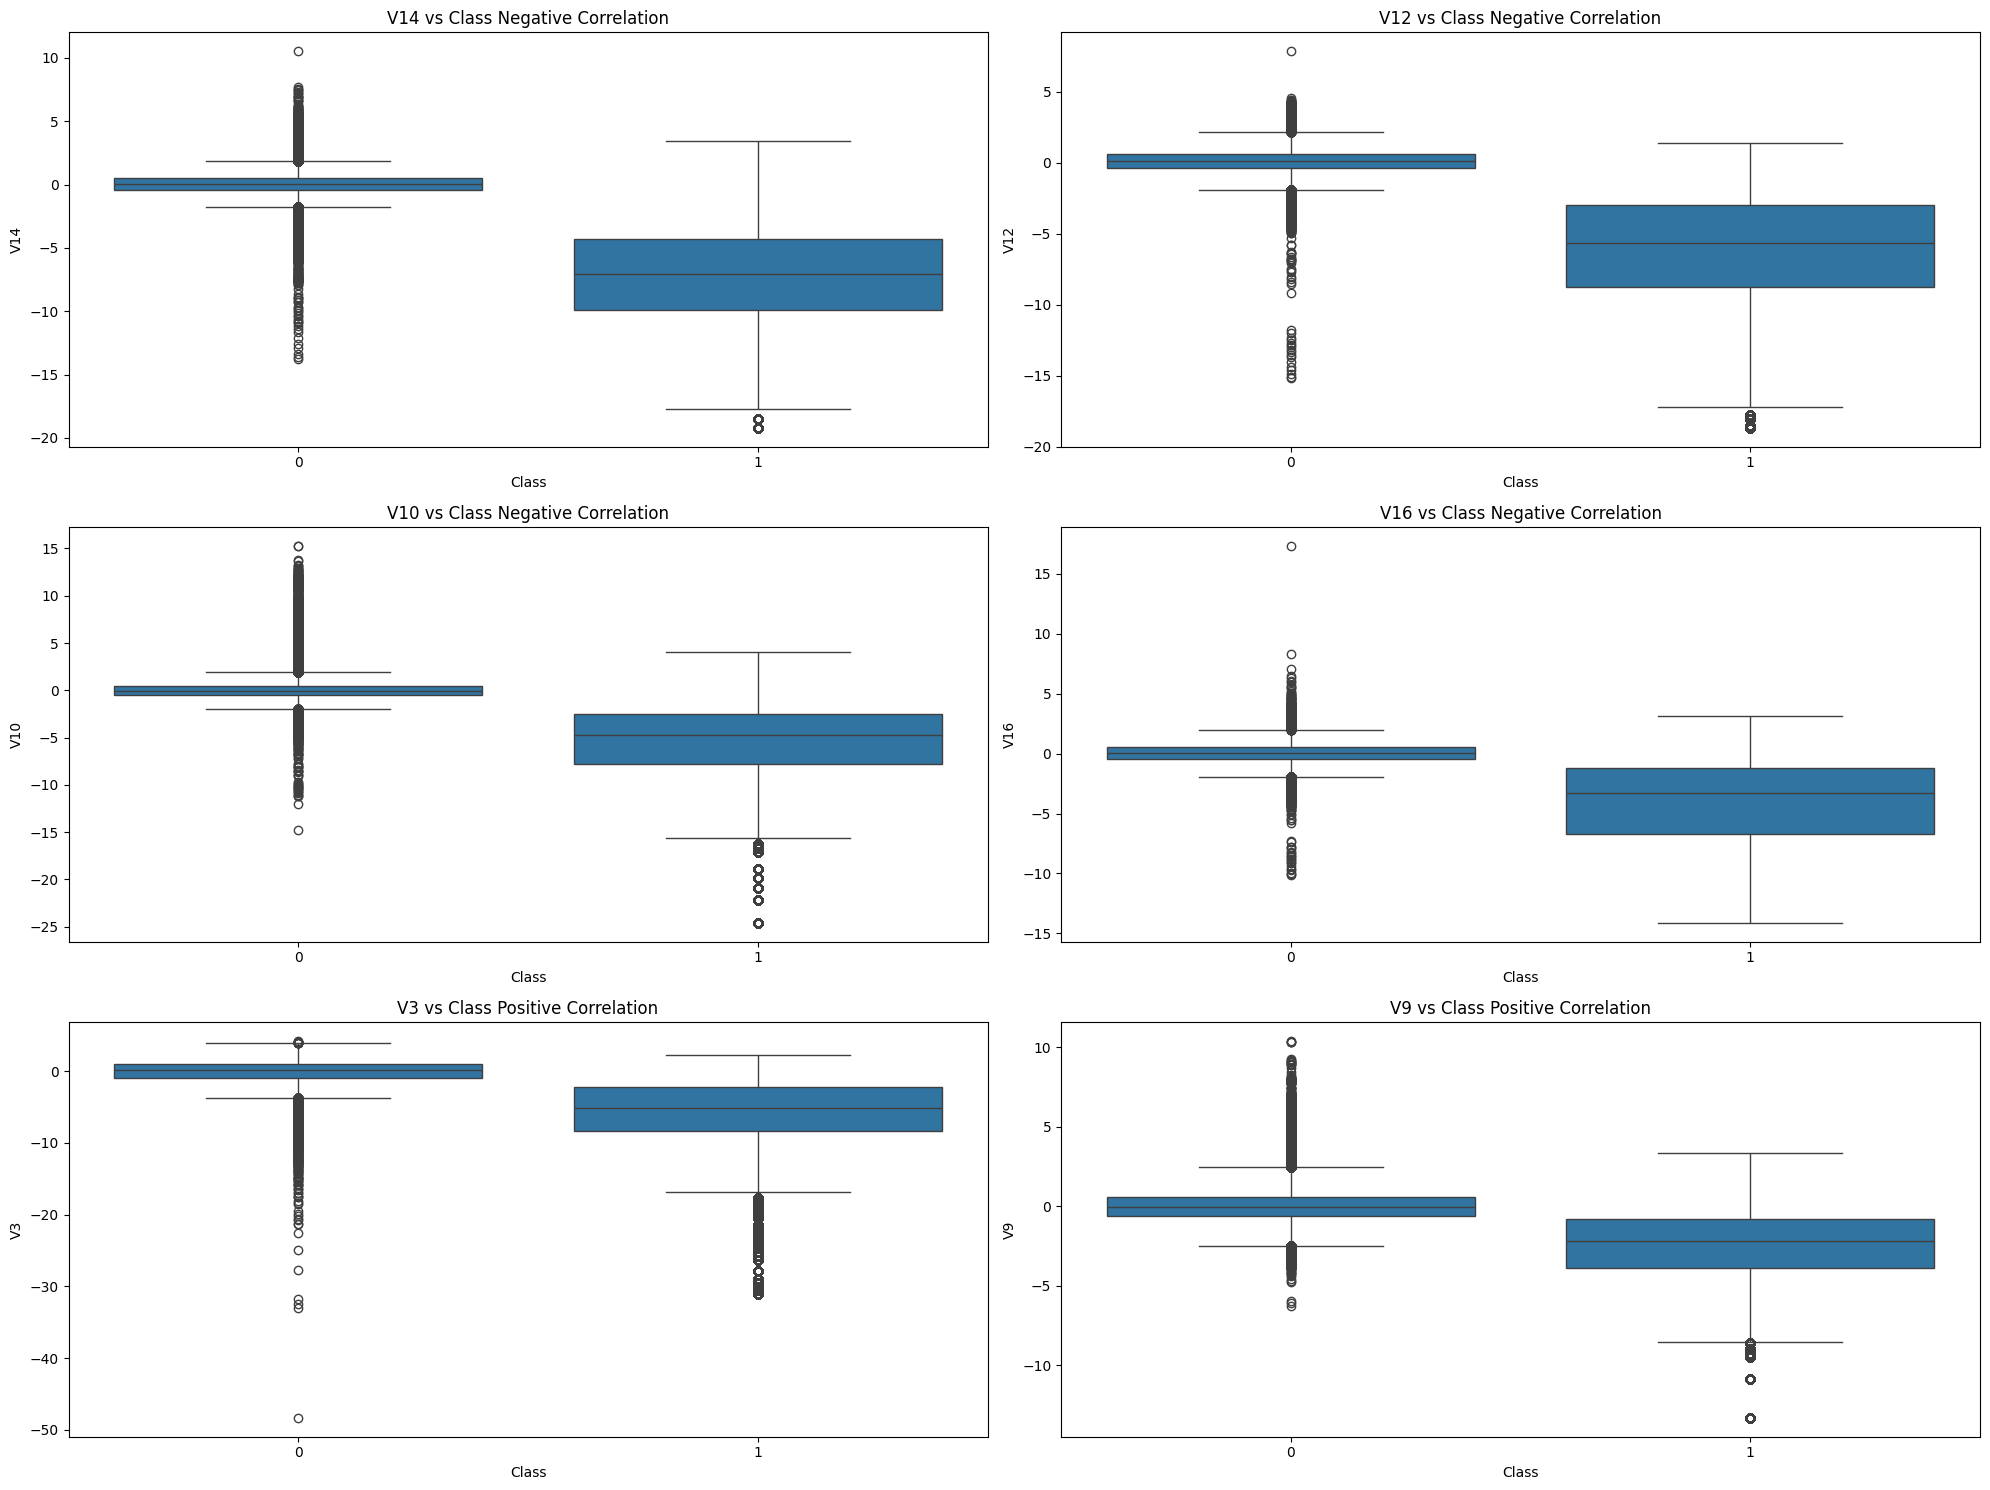

In [28]:
f, axes = plt.subplots(ncols=2, nrows=3, figsize=(20, 15))
variables = ['V14', 'V12', 'V10', 'V16', 'V3', 'V9', 'V17']
titles = ['V14 vs Class Negative Correlation', 'V12 vs Class Negative Correlation', 'V10 vs Class Negative Correlation',
          'V16 vs Class Negative Correlation', 'V3 vs Class Positive Correlation', 'V9 vs Class Positive Correlation',
          'V17 vs Class Positive Correlation']

# Plot boxplots 
for ax, var, title in zip(axes.flatten(), variables, titles):
    sns.boxplot(x="Class", y=var, data=new_df_resampled, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

**positive Correlations**

c:\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


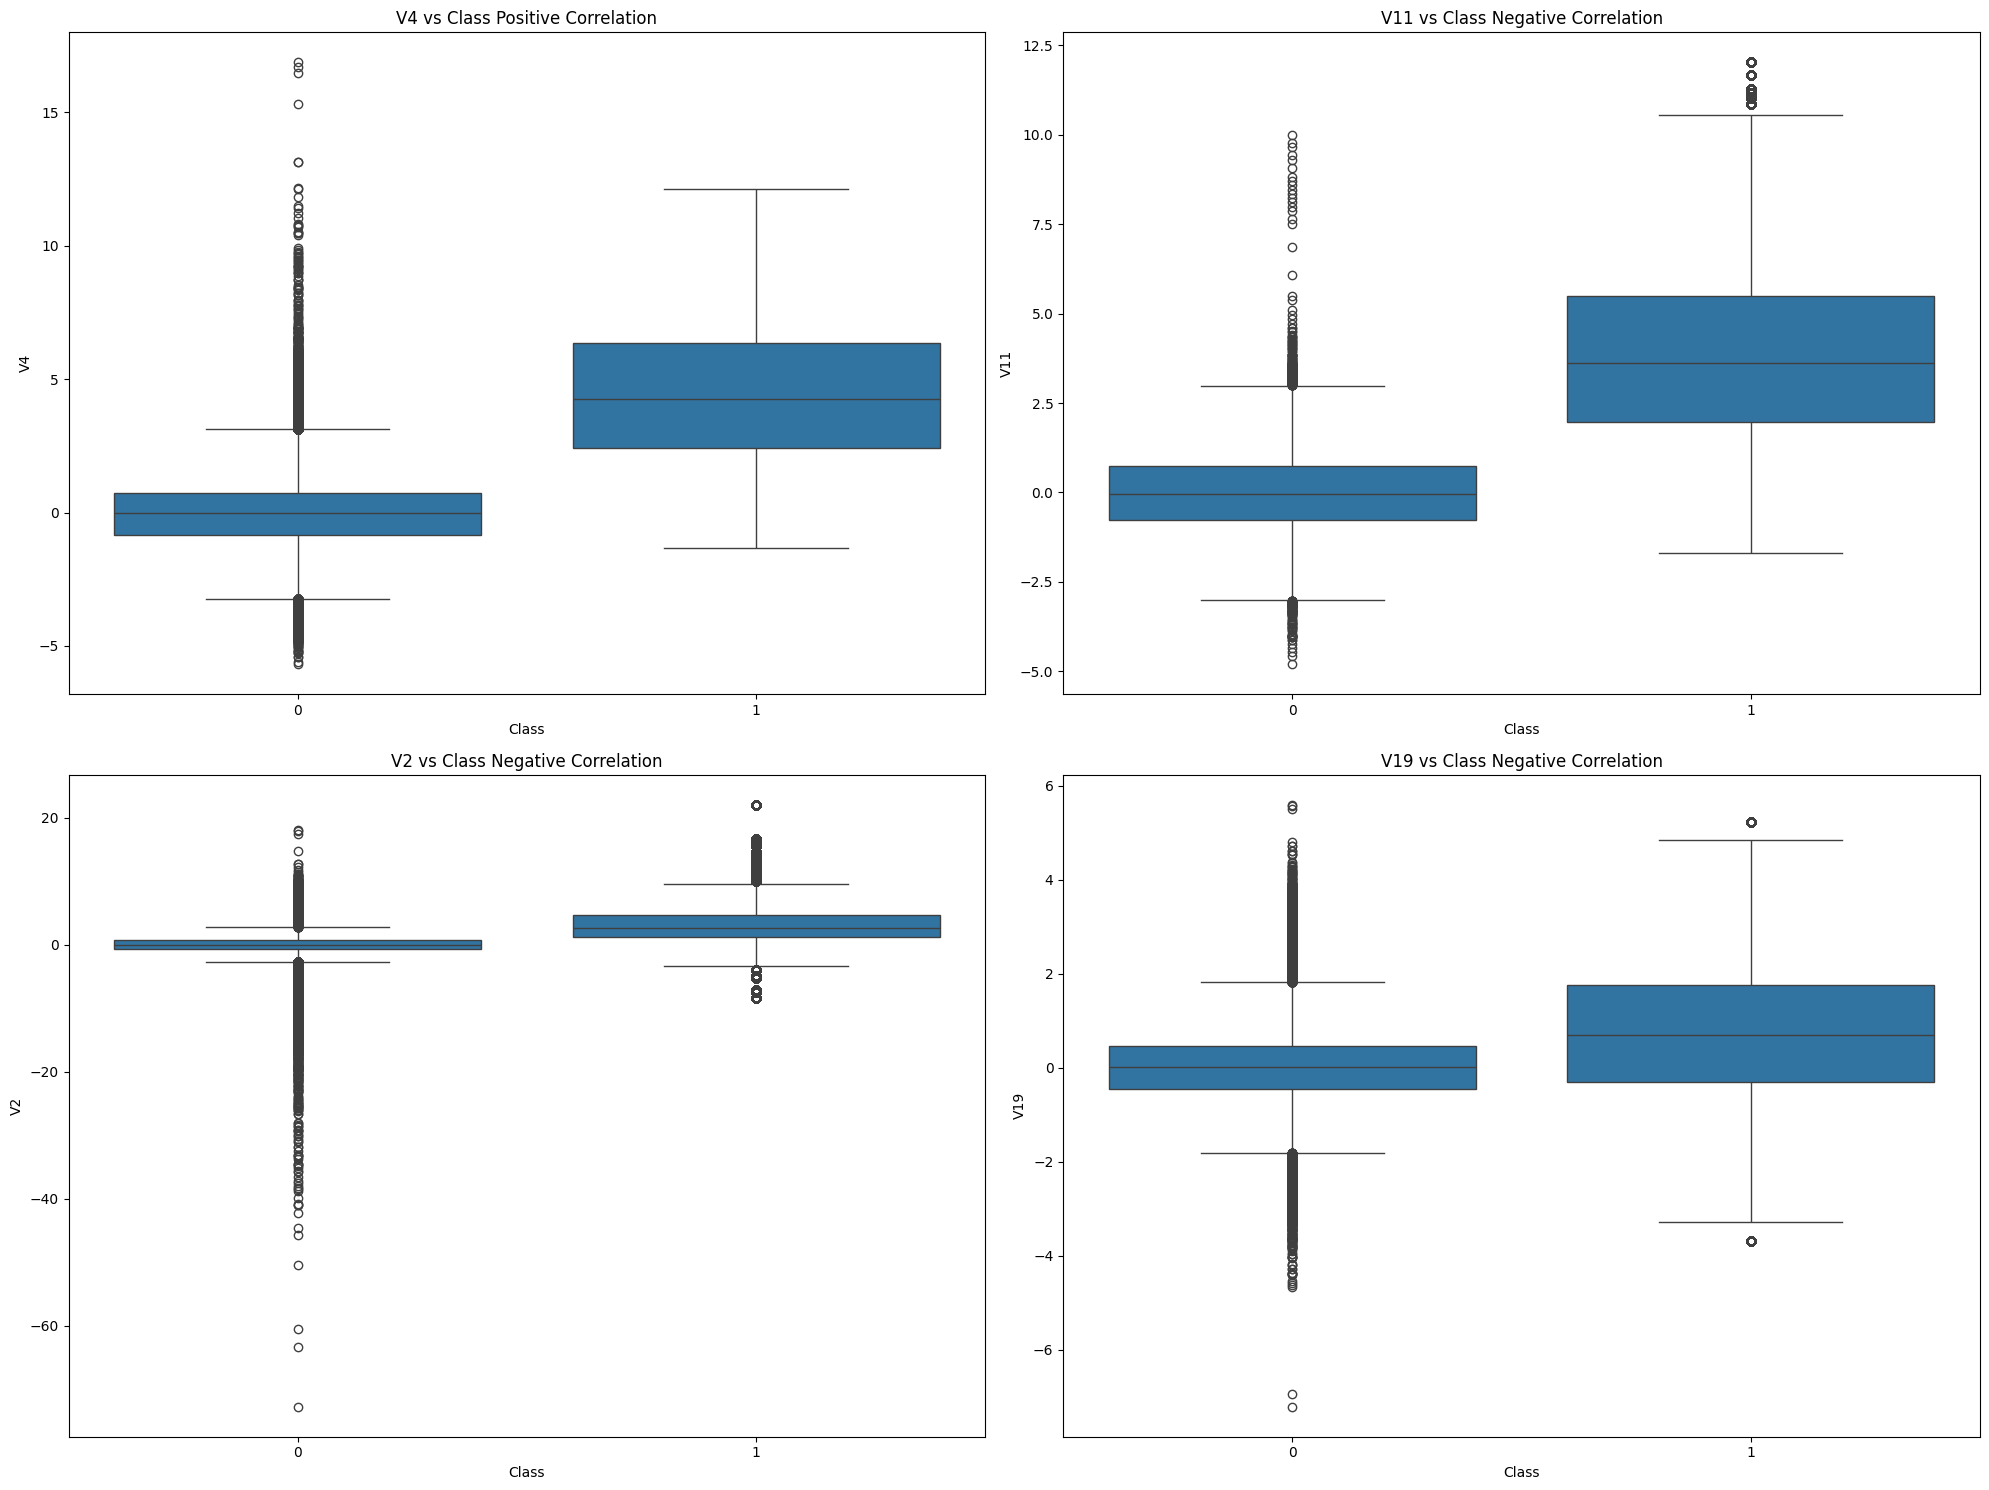

In [29]:
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))

variables = ['V4', 'V11', 'V2', 'V19']
titles = ['V4 vs Class Positive Correlation', 'V11 vs Class Negative Correlation', 'V2 vs Class Negative Correlation',
          'V19 vs Class Negative Correlation']

# Plot boxplots
for ax, var, title in zip(axes.flatten(), variables, titles):
    sns.boxplot(x="Class", y=var, data=new_df_resampled, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

**Remember how Boxplots work :**
- Box: Defined by Q1 (bottom) and Q3 (top), with a line inside representing the median (Q2).
- Whiskers: Extending outside the box, representing the range of data that is not considered outliers.
- Outliers: Individual points located outside the whiskers.

- IQR (interquartile Range) = Q3 -Q1
- Maximum = Q3+ 1.5*IQR
- Minimum = Q1 -1.5*IQR


**Outliers Treatment**


In [30]:
df_final = new_df_resampled.copy()
treat= ['V10','V3','V9', 'V2']
for j in treat:
    q25,q75= new_df[j].quantile(q=0.25),new_df[j].quantile(q=0.75)
    iqr= q75-q25
    cut_off= iqr*1.5
    lb,ub= q25-cut_off,q75+cut_off
    outliers= [x for x in new_df[j] if x<=lb or x>=ub]
    print(j,'Q25: {} , Q75: {}, IQR: {}, Cutoff: {}, LB: {}, UB: {},'.format(q25,q75,iqr,cut_off,lb,ub))
    print(len(outliers), outliers)
    df_final= df_final.drop(df_final[(df_final['V14'] > ub) | (df_final['V14']< lb)].index, axis=0)
    print(df_final.shape)
    print('----' * 44)

V10 Q25: -0.5354257264933235 , Q75: 0.453923445139507, IQR: 0.9893491716328305, Cutoff: 1.4840237574492459, LB: -2.0194494839425694, UB: 1.9379472025887527,
9496 [6.05152135077273, 3.01435477715588, 6.4278019661735, 3.35107932442158, 6.28648734944894, 2.03281200518216, 2.3036274404953, 6.51077922624328, 2.08436454313234, 8.73745780611353, 2.37295464540479, -2.31102388434087, 2.37453340136567, -2.77227214465915, 3.33444312136546, 3.55569454835195, -2.24579757016503, 8.82175647014444, 3.31752515809267, 2.23030122216737, 2.13930113608601, 2.80364198296581, -2.32638861473898, 3.62181576021616, -2.39530118035246, 2.48616181912927, 6.13644262879513, 3.98222736733685, 2.53655659112427, -3.56357769657677, 2.202713992714, 2.98152173854039, 4.07999518010006, 2.26771632359644, 6.37149379187991, 2.77907371566694, 11.9068681452696, 3.39928537980936, 4.7646527430201, -2.30927516022207, -2.0231542910072, -2.0239605853403, 2.62584060871986, -2.6366220672382, -2.18730962525522, 4.06888548822465, 3.7486

In [31]:
Counter(df_final['Class'])

Counter({0: 218648, 1: 31243})

## e) fine tuning


In [32]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

x=df_final.drop('Class',axis=1).values
y= df_final.loc[:,'Class'].values

# SPlitting the test and train after removing outliers

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
def objective(trial):
    # Utilisation de `trial` pour suggérer une valeur pour 'C'
    C = trial.suggest_loguniform('C', 1e-4, 1e2)  # loguniform est souvent utilisé pour 'C'

    # Création et évaluation du modèle avec la valeur suggérée
    model = LogisticRegression(C=C)
    score = cross_val_score(model, xtrain, ytrain, cv=5, scoring='accuracy').mean()
    return score

# Création d'une étude et exécution de l'optimisation
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Affichage des meilleurs paramètres et de la meilleure exactitude obtenue
best_params = study.best_params
best_score = study.best_value
print('Best parameters:', best_params)
print('Best cross-validation accuracy:', best_score)


[I 2024-06-27 10:55:02,633] A new study created in memory with name: no-name-02b61c60-f55c-493f-b8c8-13568e0dd4d0
[I 2024-06-27 10:55:10,160] Trial 0 finished with value: 0.916473240309764 and parameters: {'C': 0.30056767054039746}. Best is trial 0 with value: 0.916473240309764.
[I 2024-06-27 10:55:18,253] Trial 1 finished with value: 0.9162931616503769 and parameters: {'C': 4.265443555505268}. Best is trial 0 with value: 0.916473240309764.
[I 2024-06-27 10:55:20,616] Trial 2 finished with value: 0.9131417804195016 and parameters: {'C': 0.00023531505781079727}. Best is trial 0 with value: 0.916473240309764.
[I 2024-06-27 10:55:29,313] Trial 3 finished with value: 0.9162881595244734 and parameters: {'C': 18.475260958098456}. Best is trial 0 with value: 0.916473240309764.
[I 2024-06-27 10:55:37,694] Trial 4 finished with value: 0.9162631482694085 and parameters: {'C': 32.05896997431657}. Best is trial 0 with value: 0.916473240309764.
[I 2024-06-27 10:55:45,136] Trial 5 finished with valu

Best parameters: {'C': 0.030568575843250612}
Best cross-validation accuracy: 0.9175887242698926


In [35]:
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    score = cross_val_score(model, xtrain, ytrain, cv=5, scoring='accuracy').mean()
    return score

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=5)
print('Best parameters for KNN:', study_knn.best_params)
print('Best cross-validation accuracy for KNN:', study_knn.best_value)



[I 2024-06-27 17:03:58,641] A new study created in memory with name: no-name-c8ee32fd-d5b1-49f9-a1b3-639a174c7f3a
[I 2024-06-27 17:05:41,377] Trial 0 finished with value: 0.9968536160157597 and parameters: {'n_neighbors': 27}. Best is trial 0 with value: 0.9968536160157597.
[I 2024-06-27 17:07:46,192] Trial 1 finished with value: 0.9970436995525009 and parameters: {'n_neighbors': 26}. Best is trial 1 with value: 0.9970436995525009.
[I 2024-06-27 17:09:25,544] Trial 2 finished with value: 0.9982442282855413 and parameters: {'n_neighbors': 16}. Best is trial 2 with value: 0.9982442282855413.
[I 2024-06-27 17:11:16,792] Trial 3 finished with value: 0.9988544970289779 and parameters: {'n_neighbors': 10}. Best is trial 3 with value: 0.9988544970289779.
[I 2024-06-27 17:13:04,080] Trial 4 finished with value: 0.9993697225027305 and parameters: {'n_neighbors': 5}. Best is trial 4 with value: 0.9993697225027305.


Best parameters for KNN: {'n_neighbors': 5}
Best cross-validation accuracy for KNN: 0.9993697225027305


In [33]:
def objective_dt(trial):
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    score = cross_val_score(model, xtrain, ytrain, cv=5, scoring='accuracy').mean()
    return score

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=50)
print('Best parameters for Decision Tree:', study_dt.best_params)
print('Best cross-validation accuracy for Decision Tree:', study_dt.best_value)



[I 2024-06-27 15:01:12,179] A new study created in memory with name: no-name-6d58097e-1e9f-40f9-ac6c-8d81137a5e05
[I 2024-06-27 15:01:40,054] Trial 0 finished with value: 0.9983942950652732 and parameters: {'max_depth': 19, 'min_samples_split': 8}. Best is trial 0 with value: 0.9983942950652732.
[I 2024-06-27 15:02:06,172] Trial 1 finished with value: 0.9993697245044816 and parameters: {'max_depth': 26, 'min_samples_split': 8}. Best is trial 1 with value: 0.9993697245044816.
[I 2024-06-27 15:02:32,388] Trial 2 finished with value: 0.9983042551725871 and parameters: {'max_depth': 17, 'min_samples_split': 4}. Best is trial 1 with value: 0.9993697245044816.
[I 2024-06-27 15:02:59,673] Trial 3 finished with value: 0.9996198334269554 and parameters: {'max_depth': 31, 'min_samples_split': 10}. Best is trial 3 with value: 0.9996198334269554.
[I 2024-06-27 15:03:26,140] Trial 4 finished with value: 0.9986944253718916 and parameters: {'max_depth': 23, 'min_samples_split': 7}. Best is trial 3 wi

Best parameters for Decision Tree: {'max_depth': 32, 'min_samples_split': 7}
Best cross-validation accuracy for Decision Tree: 0.9996298378038718


In [34]:
#def objective_gb(trial):
    #n_estimators = trial.suggest_int('n_estimators', 50, 200)
    #learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0)
    #max_depth = trial.suggest_int('max_depth', 3, 10)
    #model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    #score = cross_val_score(model, xtrain, ytrain, cv=5, scoring='accuracy').mean()
    #return score

#study_gb = optuna.create_study(direction='maximize')
#study_gb.optimize(objective_gb, n_trials=3)
#print('Best parameters for Gradient Boosting:', study_gb.best_params)
#print('Best cross-validation accuracy for Gradient Boosting:', study_gb.best_value)


## e) Machine learning

In [37]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

x=df_final.drop('Class',axis=1).values
y= df_final.loc[:,'Class'].values

# SPlitting the test and train after removing outliers

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
#best parameters
best_params_lr = {'C': 0.030568575843250612} 
best_params_knn = {'n_neighbors': 5}
best_params_dt = {'max_depth': 32, 'min_samples_split': 7}
best_params_gb = {'n_estimators': 189, 'learning_rate': 0.9477474907071367, 'max_depth': 10}


In [39]:
classifier= {
    'Logistic Regression':LogisticRegression(**best_params_lr),
    'KNN':KNeighborsClassifier(**best_params_knn),
    'DecisionTree':DecisionTreeClassifier(**best_params_dt),
    'gradient Boosting' : GradientBoostingClassifier(**best_params_gb),
}

import warnings
warnings.filterwarnings('ignore')

In [40]:
for key,values in classifier.items():
    values.fit(xtrain,ytrain)
    training_score= cross_val_score(values,xtrain,ytrain,cv=5)
    print('Training accuracy score of {} is {}'.format(key,round(training_score.mean()*100,2)))
    train_pred = cross_val_predict(values, xtrain, ytrain, cv=5)
    test_score= cross_val_score(values,xtest,ytest,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, xtest, ytest, cv=5)
    print('---'*30)

Training accuracy score of Logistic Regression is 91.76
Test accuracy score of Logistic Regression is 91.29
------------------------------------------------------------------------------------------
Training accuracy score of KNN is 99.94
Test accuracy score of KNN is 99.72
------------------------------------------------------------------------------------------
Training accuracy score of DecisionTree is 99.96
Test accuracy score of DecisionTree is 99.84
------------------------------------------------------------------------------------------
Training accuracy score of gradient Boosting is 100.0
Test accuracy score of gradient Boosting is 100.0
------------------------------------------------------------------------------------------


## e) Stacking

In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Définir les estimateurs de base
estimators = [
    ('lr', classifier['Logistic Regression']),
    ('knn', classifier['KNN']),
    ('dt', classifier['DecisionTree']),
    ('gb', classifier['gradient Boosting'])
]

# Définir le modèle méta-apprenant, ici une régression logistique
meta_learner = LogisticRegression()

# Création du modèle de stacking
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=meta_learner, cv=5)

# Entraînement du modèle de stacking
stacking_classifier.fit(xtrain, ytrain)

# Évaluation du modèle de stacking
stacking_score = stacking_classifier.score(xtest, ytest)
print(f'Test accuracy score of the stacking model is {round(stacking_score * 100, 2)}%')


Test accuracy score of the stacking model is 100.0%
